<a href="https://colab.research.google.com/github/MoayadBatwa/NLP-SentimentAnalysis/blob/main/SentimentAnalysis_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Step	Description

0	--- Install needed libraries.

1	--- Imported libraries and loaded the Mental Health dataset.

2	--- Droped rows where 'statement' is missing & Cleaned the text by removing special characters, and stopwords. Droped the rows where any data is missing or empty.

3	--- Converted statement to numbers using TF-IDF Vectorization.

4	--- Split data into Training (80%) and Testing (20%) sets.

5	--- Trained a Logistic Regression classifier.

6	--- Evaluated the model using Accuracy and Classification Report.

7	--- Visualized performance using Confusion Matrix & Multi-Class ROC Curves.

8 ---	Created a batch function to classify a list of custom strings provided by the user.

## Step 0: Install Libraries

In [2]:
pip install pandas nltk matplotlib seaborn kagglehub

## Step 1: Imports and Setup

In [3]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from itertools import cycle
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
import os

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Step 2: Loading and Inspecting Data

In [4]:
path = kagglehub.dataset_download("suchintikasarkar/sentiment-analysis-for-mental-health")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'sentiment-analysis-for-mental-health' dataset.
Path to dataset files: /kaggle/input/sentiment-analysis-for-mental-health


Sample of the dataset:
    status                                          statement
0  Anxiety                                         oh my gosh
1  Anxiety  trouble sleeping, confused mind, restless hear...
2  Anxiety  All wrong, back off dear, forward doubt. Stay ...
3  Anxiety  I've shifted my focus to something else but I'...
4  Anxiety  I'm restless and restless, it's been a month n...



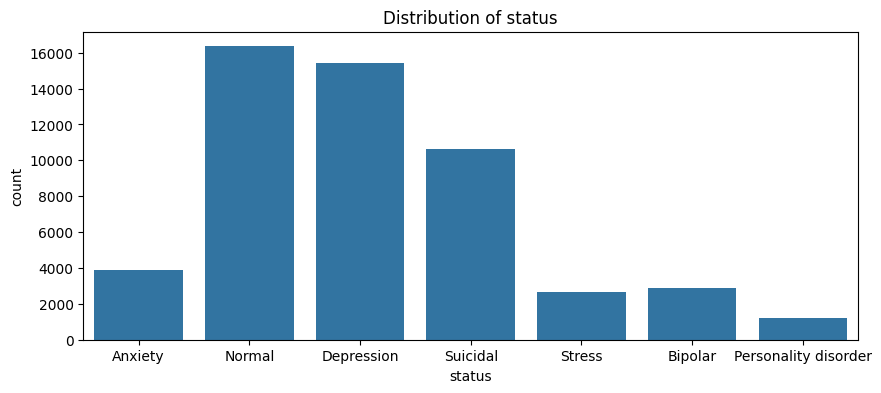

In [5]:
df = pd.read_csv(os.path.join(path, "Combined Data.csv"))

print("Sample of the dataset:")
print(df[['status', 'statement']].head())
print()
plt.figure(figsize=(10,4))
sns.countplot(x='status', data=df)
plt.title('Distribution of status')
plt.show()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53043 entries, 0 to 53042
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  53043 non-null  int64 
 1   statement   52681 non-null  object
 2   status      53043 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB


In [7]:
# Check for standard missing values (NaN/None)
print("Missing values (NaN) per column:")
print(df.isna().sum())

# Check for empty strings (if you suspect hidden empty text)
print("\nEmpty strings per column:")
print((df == '').sum())

Missing values (NaN) per column:
Unnamed: 0      0
statement     362
status          0
dtype: int64

Empty strings per column:
Unnamed: 0    0
statement     0
status        0
dtype: int64


## Step 3: Data Preprocessing

In [8]:
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text) # Remove special chars
    words = text.split()
    filtered_words = [w for w in words if w not in stop_words]
    return " ".join(filtered_words)

# Drop rows where 'statement' is missing
df.dropna(subset=['statement'] , inplace=True)

df['statement'].apply(clean_text)

# Replace empty strings '' or whitespace ' ' with NaN
df.replace(r'^\s*$', np.nan, regex=True, inplace=True)

# Drop rows where any data is missing
df.dropna(inplace=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52681 entries, 0 to 53042
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  52681 non-null  int64 
 1   statement   52681 non-null  object
 2   status      52681 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.6+ MB


In [9]:
# Check for standard missing values (NaN/None)
print("Missing values (NaN) per column:")
print(df.isna().sum())

# Check for empty strings (if you suspect hidden empty text)
print("\nEmpty strings per column:")
print((df == '').sum())

Missing values (NaN) per column:
Unnamed: 0    0
statement     0
status        0
dtype: int64

Empty strings per column:
Unnamed: 0    0
statement     0
status        0
dtype: int64


## Step 4: Feature Extraction (TF-IDF)

In [10]:
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['statement']).toarray()
y = df['status']

## Step 5: Splitting the Dataset

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

## Step 6: Model Training

In [12]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

## Step 7: Evaluation

In [13]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy*100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Model Accuracy: 76.64%

Classification Report:
                      precision    recall  f1-score   support

             Anxiety       0.82      0.74      0.78       836
             Bipolar       0.89      0.68      0.77       563
          Depression       0.69      0.74      0.72      3030
              Normal       0.85      0.95      0.90      3223
Personality disorder       0.85      0.44      0.58       226
              Stress       0.66      0.47      0.55       495
            Suicidal       0.71      0.66      0.68      2164

            accuracy                           0.77     10537
           macro avg       0.78      0.67      0.71     10537
        weighted avg       0.77      0.77      0.76     10537



## Step 8: Visualization of Results

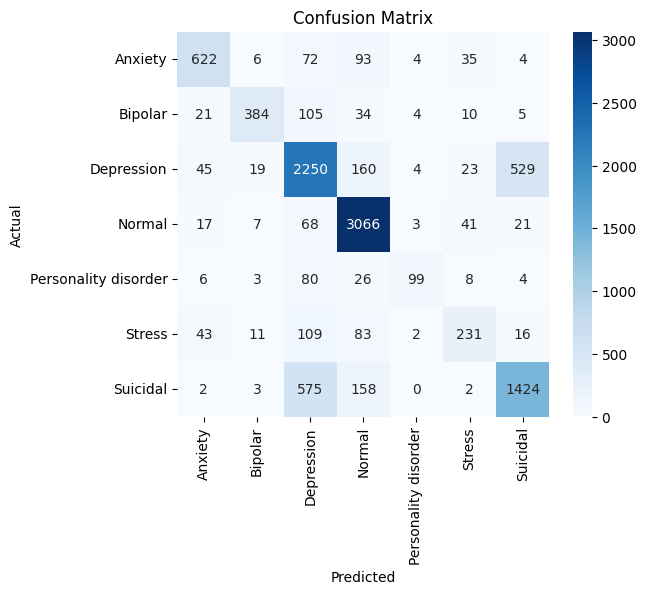

In [14]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

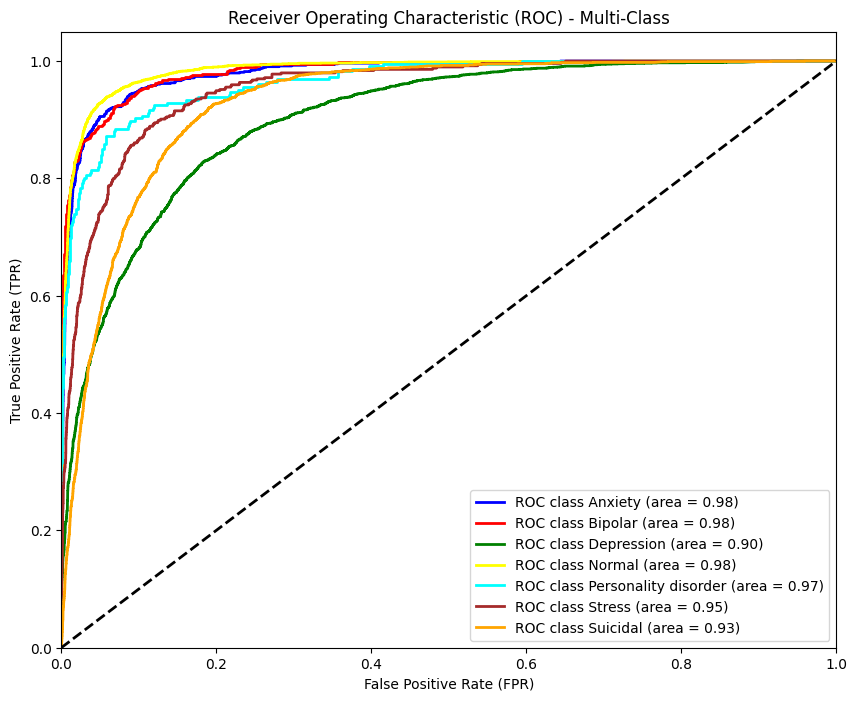

In [15]:
classes = model.classes_
y_test_bin = label_binarize(y_test, classes=classes)
n_classes = y_test_bin.shape[1]

y_score = model.predict_proba(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


plt.figure(figsize=(10, 8))
colors = cycle(['blue', 'red', 'green', 'yellow', 'cyan', 'brown', 'orange']) # Assign a color to each class

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC class {classes[i]} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2) # Diagonal line (random guess)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) - Multi-Class')
plt.legend(loc="lower right")
plt.show()

## Step 8: Batch Prediction (List of Inputs)

In [16]:
def predict_batch(tweet_list):
    print(f"\n--- Processing {len(tweet_list)} Statements ---\n")

    for text in tweet_list:
        cleaned = clean_text(text)

        vectorized = tfidf.transform([cleaned]).toarray()

        prediction = model.predict(vectorized)[0]

        print(f"Statement: '{text}'")
        print(f"Prediction: {prediction.upper()}")
        print("-" * 30)

user_inputs = [
    "I don't want to be worried but my heart races for no reason.",
    "I simply cannot get out of bed today, everything feels hopeless.",
    "Today was actually a really nice day, I enjoyed a walk outside.",
    "I have massive amounts of stress going on with job hunting. I live with parents who are constantly on my back and getting angry with me for not having a job.",
    "I cannot go out again, nothing left for me in life.",
    "How do you deal with your kids while on a manic? I just need some advice or coping help.",
    "Am I doomed? I recently got diagnosed with AVPD and I feel completely hopeless. This is me, and I will stay like this my whole life. Am I going to get my dream job? Have a fun life? Travel around the world? Apparently not. I'm 22 and I feel like I'm 60"
]

predict_batch(user_inputs)


--- Processing 7 Statements ---

Statement: 'I don't want to be worried but my heart races for no reason.'
Prediction: ANXIETY
------------------------------
Statement: 'I simply cannot get out of bed today, everything feels hopeless.'
Prediction: DEPRESSION
------------------------------
Statement: 'Today was actually a really nice day, I enjoyed a walk outside.'
Prediction: NORMAL
------------------------------
Statement: 'I have massive amounts of stress going on with job hunting. I live with parents who are constantly on my back and getting angry with me for not having a job.'
Prediction: NORMAL
------------------------------
Statement: 'I cannot go out again, nothing left for me in life.'
Prediction: SUICIDAL
------------------------------
Statement: 'How do you deal with your kids while on a manic? I just need some advice or coping help.'
Prediction: BIPOLAR
------------------------------
Statement: 'Am I doomed? I recently got diagnosed with AVPD and I feel completely hopeless.